# Age and Gender Detection from Images

**Team:**
* Siva Yogitha Mokkapati
* Venkat Nihaal Akula

**Course:** DAAN 897– Deep Learning (Spring II, 2020)

### Problem Statement
* Predicting the age and gender from facial images.
* **Keywords:** Classfication, Prediction, Deep Learning, emotion, Neural networks 


### Data Collection
* Source(url):(https://www.kaggle.com/jangedoo/utkface-new).

* Short Description : The dataset is taken from Kaggle.
The dataset has approximately 23000 records with age and gender details as part of the filename
* Keywords: Age, Gender,images, prediction

### Required packages
Install the required packages - 
Most of packages are already installed. The syntax for installing packages is pip install package name.

Next the installed package needs to be imported. The syntax is "import package name" or from "package" import "module name".
The packages that are required are:

In [2]:
import numpy as np 
import pandas as pd
import math
import numpy as np
import pandas as pd
import os
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, GlobalMaxPool2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

<B>Load the dataset and check number of files and a sample file </B>

In [3]:
path = "C:/Users/nihal/Desktop/DL_2/UTKFace/"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[0])

Total samples: 23708
100_0_0_20170112213500903.jpg.chip.jpg


<B> Read the image data and split age and gender values from its name </B>

In [4]:
images = []
age = []
gender = []
for file in files:
    image = cv2.imread(path+file,0)
    #image = image.reshape((image.shape[0],image.shape[1],3))
    image = np.resize(image,(48,48,3))
    images.append(image)
    split_var = file.split('_')
    age.append(split_var[0])
    gender.append(int(split_var[1]))

<B> Create Classes Split based on Age Limits </B>

In [5]:
age_groups = []
for i in age:
    i = int(i)
    if i < 18:
        age_groups.append(0)
    if (i>=18) and (i<35):
        age_groups.append(1)
    if (i>=35) and (i<50):
        age_groups.append(2)
    if (i>=50) and (i<65):
        age_groups.append(3)
    if (i>=65):
        age_groups.append(4)

### Data Preprocessing


* The images are resized into required format of (48,48,3) where 3 is the RGB format.
* Input images are squeezed to remove 1D images
* The pixels are normalized by dividing with 255.
* Age and Gender classes converted to categorical varaibles using label encoder.
* The data is spilitted into test and train.

<B> Removing the single dimension entries for better prediction </B>

In [6]:
images = np.squeeze(images)
images.shape

(23708, 48, 48, 3)

<B> Normalization Of the Images <B>

In [7]:
images = images.astype('float32')/ 255

<B> Convert Age and Gender Labels into Categorical Format </B>

In [8]:
import keras
classes = keras.utils.to_categorical(age_groups,5)
gender = keras.utils.to_categorical(gender,2)

Using TensorFlow backend.


<b>Split the data to train and validation in the ration 80:20</b>

In [17]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, classes, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train, X_test, y_train, y_test)

(18966, 48, 48, 3) (4742, 48, 48, 3) (18966, 5) (4742, 5)
[[[[0.2901961  0.2901961  0.28627452]
   [0.2784314  0.27058825 0.27450982]
   [0.28627452 0.29411766 0.30980393]
   ...
   [0.59607846 0.6039216  0.6       ]
   [0.59607846 0.5921569  0.58431375]
   [0.5803922  0.57254905 0.57254905]]

  [[0.5647059  0.5647059  0.5568628 ]
   [0.5529412  0.54509807 0.5372549 ]
   [0.53333336 0.5294118  0.5294118 ]
   ...
   [0.6039216  0.6117647  0.6156863 ]
   [0.61960787 0.62352943 0.627451  ]
   [0.627451   0.627451   0.627451  ]]

  [[0.6313726  0.6313726  0.6313726 ]
   [0.63529414 0.63529414 0.63529414]
   [0.6392157  0.6392157  0.6392157 ]
   ...
   [0.5137255  0.5058824  0.4745098 ]
   [0.43137255 0.4        0.36078432]
   [0.29803923 0.21960784 0.15686275]]

  ...

  [[0.6392157  0.6392157  0.6392157 ]
   [0.63529414 0.627451   0.61960787]
   [0.6156863  0.6117647  0.627451  ]
   ...
   [0.7607843  0.7607843  0.7647059 ]
   [0.7647059  0.75686276 0.75686276]
   [0.74509805 0.70980394 0

<b>Get the image width, height, depth and number of classes to use them while building models</b>

In [18]:
img_width = X_test.shape[1]
img_height = X_test.shape[2]
img_depth = X_test.shape[3]
num_classes = y_test.shape[1]
print(img_width,img_height,img_depth,num_classes)

48 48 3 5


### Methodology

1. To build deep neural networks and convolutional neural networks for emotion detection. To appl transfer learning (VGG) for training the model by making appropriate changes for the VGG model after importing it for emotion detection. To similiar approach as used for emotion detection and build models for age and gender detection.

2. Deep Neural Networks you used in the project
 * ConvNet
    *  A convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery(source Wikipedia) 
 

 
3. Keywords  
**Keywords:**  supervised learning, classification, prediction, neural networks.

### Model fitting / Validation / Evaluation for age

1. Model
   
    6 CNN layers with 32, 64, 128 neurons for each two layers and 2D max pooling layer after every 2 layers. 
    

2. Model 4
    
    Activation function relu, kernel initializer “he_normal”, padding “same”, kernel size (5,5) for first layer and (3,3) for the rest of the layers, dropout 0.4, batch normalization after each layer. Total 6 CNN layers and 2 dense layers at the end.
    
    2D max pooling of (2,2) after every 2 layers. Data augmentation (rotation_range=15,width_shift_range=0.15, height_shift_range=0.15,shear_range=0.15,zoom_range=0.15,horizontal_flip=True)
    
    
    
3. Model 5
    Generating the first model with less convolution Layers for better accuracy
    
    

4. Model 6 
    Same as model 4 but the activation function is elu
    
    

5. Model 7
    Building a simple CNN model with bigger kernel weights (96, 256, 384)
    
    



<b>Optimal Age Detection Model: Model 4</b>

* Optimizer: Adam
* Loss Function : Categorical Cross entropy
* Regularization: Drop out, Batch Normalization
* Output Activation Function: Softmax
* Activation Function: Relu 
* Kernel size: (3,3) and (5,5)
* Kernel initializer: he_normal
* Pooling Layers: Max Pooling (2D)



<B>First Model- A simple Convolution Neural Network Model </B>

In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height,img_depth)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 128)        

In [19]:
#Now fit the model for 30 epcohs with bacth size 
history = model.fit(X_train, y_train, batch_size = 210, epochs=25, verbose=1, validation_data=(X_test, y_test))

Train on 18966 samples, validate on 4742 samples
Epoch 1/25
18966/18966 [==============================] - 29s 2ms/sample - loss: 1.4163 - accuracy: 0.4221 - val_loss: 1.3683 - val_accuracy: 0.4494
Epoch 2/25
18966/18966 [==============================] - 24s 1ms/sample - loss: 1.3781 - accuracy: 0.4455 - val_loss: 1.3472 - val_accuracy: 0.4576
Epoch 3/25
18966/18966 [==============================] - 23s 1ms/sample - loss: 1.3631 - accuracy: 0.4494 - val_loss: 1.3426 - val_accuracy: 0.4627
Epoch 4/25
18966/18966 [==============================] - 24s 1ms/sample - loss: 1.3475 - accuracy: 0.4562 - val_loss: 1.3312 - val_accuracy: 0.4665
Epoch 5/25
18966/18966 [==============================] - 24s 1ms/sample - loss: 1.3416 - accuracy: 0.4617 - val_loss: 1.3192 - val_accuracy: 0.4747
Epoch 6/25
18966/18966 [==============================] - 24s 1ms/sample - loss: 1.3228 - accuracy: 0.4686 - val_loss: 1.3160 - val_accuracy: 0.4751
Epoch 7/25
18966/18966 [==============================] -

<b>We can see that the accuracy on train is 59% and on validation is 50% which indicates that the model is underfitting. Also, the train and the validation loss are very high. Hence we need to build a complex model.</b>

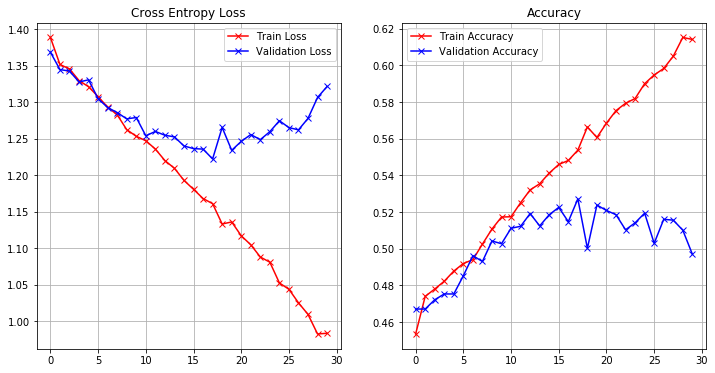

In [23]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history["loss"], 'r-x', label="Train Loss")
ax.plot(history.history["val_loss"], 'b-x', label="Validation Loss")
ax.legend()
ax.set_title('Cross Entropy Loss')
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history["accuracy"], 'r-x', label="Train Accuracy")
ax.plot(history.history["val_accuracy"], 'b-x', label="Validation Accuracy")
ax.legend()
ax.set_title('Accuracy')
ax.grid(True)

<B> Second Model- Complex CNN Model. </B>

In [11]:
model4 = Sequential()
model4.add(Conv2D(filters=64,kernel_size=(5,5),input_shape=(img_width, img_height, img_depth),activation='relu',
                      padding='same',kernel_initializer='he_normal'))
model4.add(BatchNormalization())
model4.add(Conv2D(
            filters=64,
            kernel_size=(5,5),
            activation='relu',
            padding='same',
            kernel_initializer='he_normal'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.4))
model4.add(Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='relu',
            padding='same',
            kernel_initializer='he_normal'))
model4.add(BatchNormalization())
model4.add(Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='relu',
            padding='same',
            kernel_initializer='he_normal'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.4))
model4.add(Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='relu',
            padding='same',
            kernel_initializer='he_normal'))
model4.add(BatchNormalization())
model4.add(Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='relu',
            padding='same',
            kernel_initializer='he_normal'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.5, name='dropout_3'))
model4.add(Flatten())   
model4.add( Dense(128,activation='relu',kernel_initializer='he_normal'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(
            num_classes,
            activation='softmax'))
model4.summary()
model4.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])


history4 = model4.fit(X_train, y_train, epochs=35, verbose=1, validation_data=(X_test, y_test))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       7

<B> A Model has been generated with 69% Training Accuracy and 53% Validation Accuracy, After considering all the other models this is our best and optimal model </B>

<B> Generating the Confusion Matrix </B>

total wrong validation predictions: 2232


              precision    recall  f1-score   support

           0       0.68      0.60      0.63       853
           1       0.58      0.79      0.67      1995
           2       0.30      0.16      0.21       894
           3       0.32      0.16      0.22       628
           4       0.37      0.49      0.42       372

    accuracy                           0.53      4742
   macro avg       0.45      0.44      0.43      4742
weighted avg       0.49      0.53      0.50      4742



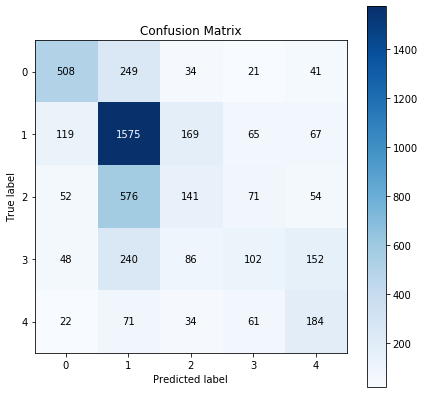

In [13]:
import scikitplot
y_valid = model4.predict_classes(X_test)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_test, axis=1), y_valid, figsize=(7,7))

print(f'total wrong validation predictions: {np.sum(np.argmax(y_test, axis=1) != y_valid)}\n\n')
print(classification_report(np.argmax(y_test, axis=1), y_valid))

<B> Plotting the Train Vs Validation Accuracy and Loss Graphs </B>

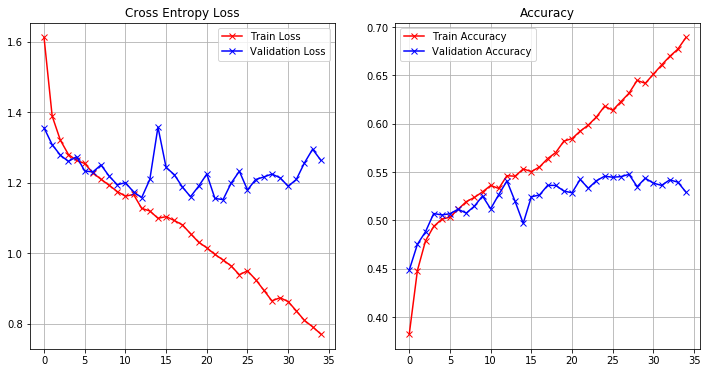

In [14]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history4.history["loss"], 'r-x', label="Train Loss")
ax.plot(history4.history["val_loss"], 'b-x', label="Validation Loss")
ax.legend()
ax.set_title('Cross Entropy Loss')
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax.plot(history4.history["accuracy"], 'r-x', label="Train Accuracy")
ax.plot(history4.history["val_accuracy"], 'b-x', label="Validation Accuracy")
ax.legend()
ax.set_title('Accuracy')
ax.grid(True)

<B> Saving the model </B>

In [15]:
model4.save("C:/Users/nihal/Desktop/DL_2")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:/Users/nihal/Desktop/DL_2\assets


<B> Third Model - Regenerating the first model with less convolution Layers for better accuracy </B>

In [25]:
model5 = Sequential()

model5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height,img_depth)))
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Conv2D(128, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.25))
model5.add(Flatten())

model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.3))
model5.add(Dense(64, activation='relu'))
model5.add(Dropout(0.3))
model5.add(Dense(32, activation='relu'))
model5.add(Dropout(0.3))
model5.add(Dense(5, activation='softmax'))
model5.summary()
model5.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])

history5 = model5.fit(X_train, y_train, epochs=25, verbose=1, validation_data=(X_test, y_test))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 46, 46, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12800)            

<B> Model with accuracy of 63% and validation accuracy of 55% and its an underfitting Model</B>

<B> Plotting the Train Vs Validation Accuracy and Loss Graphs </B>

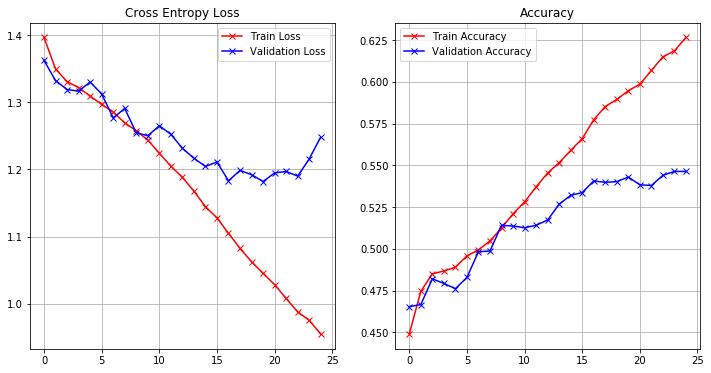

In [29]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history5.history["loss"], 'r-x', label="Train Loss")
ax.plot(history5.history["val_loss"], 'b-x', label="Validation Loss")
ax.legend()
ax.set_title('Cross Entropy Loss')
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax.plot(history5.history["accuracy"], 'r-x', label="Train Accuracy")
ax.plot(history5.history["val_accuracy"], 'b-x', label="Validation Accuracy")
ax.legend()
ax.set_title('Accuracy')
ax.grid(True)

<B> Fourth Model - Recreating the second complex model using 'elu' as activation function </B>

In [28]:
model6 = Sequential()
model6.add(Conv2D(filters=64,kernel_size=(5,5),input_shape=(img_width, img_height, img_depth),activation='elu',
                      padding='same',kernel_initializer='he_normal'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(Dropout(0.4))
model6.add(Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(Dropout(0.4))
model6.add(Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(Dropout(0.4))
model6.add(Dropout(0.5, name='dropout_3'))
model6.add(Flatten())   
model6.add( Dense(128,activation='elu',kernel_initializer='he_normal'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))
model6.add(Dense(
            5,
            activation='softmax'))
model6.summary()
model6.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])


history6 = model6.fit(X_train, y_train, epochs=25, verbose=1, validation_data=(X_test, y_test))


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 48, 48, 64)        4864      
_________________________________________________________________
batch_normalization_7 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 128)      

<B> Model with accuracy of 58% and validation accuracy of 30%, its an underfitting model </B>

<B> Plotting the Train Vs Validation Accuracy and Loss Graphs </B>

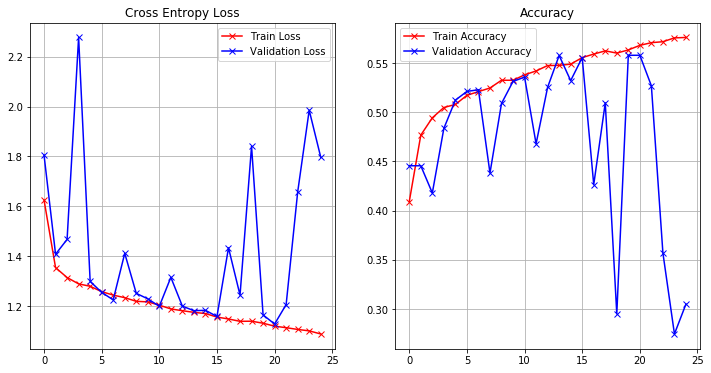

In [30]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history6.history["loss"], 'r-x', label="Train Loss")
ax.plot(history6.history["val_loss"], 'b-x', label="Validation Loss")
ax.legend()
ax.set_title('Cross Entropy Loss')
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax.plot(history6.history["accuracy"], 'r-x', label="Train Accuracy")
ax.plot(history6.history["val_accuracy"], 'b-x', label="Validation Accuracy")
ax.legend()
ax.set_title('Accuracy')
ax.grid(True)

<B> Fifth Model - Building a simple CNN model with bigger kernel weights (96, 256, 384) </B>

In [32]:
model7 = Sequential()

model7.add(Conv2D(96, (7, 7), activation='relu', input_shape=(img_width, img_height,img_depth)))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(BatchNormalization())
model7.add(Conv2D(256, (5, 5), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(BatchNormalization())
model7.add(Conv2D(384, (3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Flatten())
model7.add(Dense(512, activation='relu'))
model7.add(Dropout(0.3))
model7.add(Dense(128, activation='relu'))
model7.add(Dropout(0.3))
model7.add(Dense(5, activation='softmax'))
model7.summary()

model7.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])


history7 = model7.fit(X_train, y_train, epochs=25, verbose=1, validation_data=(X_test, y_test))


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 42, 42, 96)        14208     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 21, 21, 96)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 21, 21, 96)        384       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 17, 17, 256)       614656    
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 6, 6, 384)        

<B> Model with accuracy of 59% and validation accuracy of 53%, which is an underfitting model </B>

<B> Plotting the Train Vs Validation Accuracy and Loss Graphs </B>

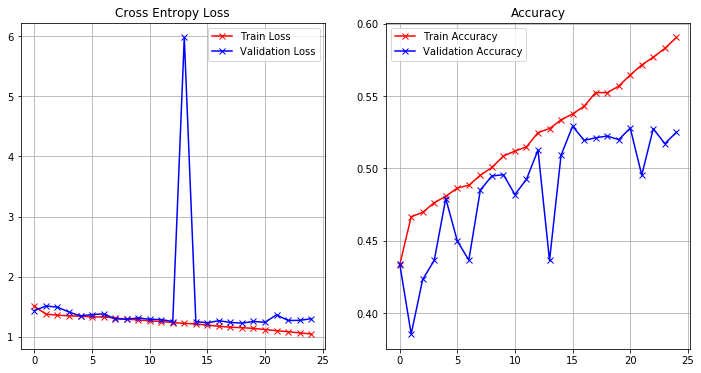

In [33]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history7.history["loss"], 'r-x', label="Train Loss")
ax.plot(history7.history["val_loss"], 'b-x', label="Validation Loss")
ax.legend()
ax.set_title('Cross Entropy Loss')
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax.plot(history7.history["accuracy"], 'r-x', label="Train Accuracy")
ax.plot(history7.history["val_accuracy"], 'b-x', label="Validation Accuracy")
ax.legend()
ax.set_title('Accuracy')
ax.grid(True)

<h1> Gender Classification <h1>

<B> Splitting the image and Gender classes data into Train and Test splits </B>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, gender, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train, X_test, y_train, y_test)

(18966, 48, 48, 3) (4742, 48, 48, 3) (18966, 2) (4742, 2)
[[[[0.14509805 0.14509805 0.14901961]
   [0.15294118 0.15294118 0.15294118]
   [0.14901961 0.14901961 0.13725491]
   ...
   [0.5019608  0.49019608 0.5176471 ]
   [0.53333336 0.5254902  0.5137255 ]
   [0.49019608 0.45490196 0.41960785]]

  [[0.36078432 0.32941177 0.28235295]
   [0.23529412 0.20392157 0.18039216]
   [0.16470589 0.15294118 0.15294118]
   ...
   [0.25882354 0.26666668 0.27058825]
   [0.2784314  0.2901961  0.29411766]
   [0.2901961  0.27450982 0.25882354]]

  [[0.23529412 0.22352941 0.21176471]
   [0.20784314 0.21176471 0.21176471]
   [0.21176471 0.20784314 0.20784314]
   ...
   [0.13333334 0.13333334 0.13725491]
   [0.14117648 0.14901961 0.15294118]
   [0.15686275 0.15686275 0.15686275]]

  ...

  [[0.41568628 0.41960785 0.42352942]
   [0.42352942 0.42745098 0.43137255]
   [0.43529412 0.43529412 0.44313726]
   ...
   [0.17254902 0.1764706  0.1764706 ]
   [0.1764706  0.1764706  0.18431373]
   [0.19215687 0.2        0

<b>Get the image width, height, depth and number of classes to use them while building models</b>

In [10]:
img_width = X_test.shape[1]
img_height = X_test.shape[2]
img_depth = X_test.shape[3]
num_classes = y_test.shape[1]
print(img_width,img_height,img_depth,num_classes)

48 48 3 2


### Methodology 
### Model fitting / Validation / Evaluation for age

1. Modelg
   
    4 Convolution layers and 3 dense layers with max pooling after each layer and dropout after all the convolutional layers. Activation function for output layer is sigmoid and relu for other layers.
    

2. Modelg1 
     Simple CNN model with bigger kernel weights (96, 256, 384). 3 CNN layers and 3 Dense layers with max pooling and batch normalization after each CNN layer. Drop out is added after each dense layer. Sigmoid for output layer and relu for other layers.
    
    
3. Modelg2
    Basic CNN model

<B> Reasoning: </B>
on compaing the confusion matrix of model g1 and model g2 we can see that model g1 has more accuracy in predicting female gender when compared to g2. Hence model g1 is our optimal model.

<b>Optimal Gender Detection Model :Model g1</b>

* Optimizer: Adam
* Loss Function : Binary Cross entropy
* Regularization: Drop out, Batch Normalization
* Output Activation Function: Sigmoid
* Activation Function: Relu 
* Kernel size: (3,3) , (5,5) and (7,7)
* Pooling Layers: Max Pooling (2D)




<B> Creating a Simple CNN Model </B>

In [21]:
modelg = Sequential()

modelg.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height,img_depth)))
modelg.add(MaxPooling2D(pool_size=(2, 2)))
modelg.add(Conv2D(64, (3, 3), activation='relu'))
modelg.add(MaxPooling2D(pool_size=(2, 2)))
modelg.add(Conv2D(128, (3, 3), activation='relu'))
modelg.add(MaxPooling2D(pool_size=(2, 2)))
modelg.add(Conv2D(128, (3, 3), activation='relu'))
modelg.add(MaxPooling2D(pool_size=(2, 2)))
modelg.add(Dropout(0.3))
modelg.add(Flatten())
modelg.add(Dense(256, activation='relu'))
modelg.add(Dropout(0.3))
modelg.add(Dense(128, activation='relu'))
modelg.add(Dropout(0.3))
modelg.add(Dense(2, activation='sigmoid'))
modelg.summary()

modelg.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])

historyg = modelg.fit(X_train, y_train, epochs=25, verbose=1, validation_data=(X_test, y_test))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 2, 2, 128)        

<B> This model has accuracy of 76% and validation accuracy of 68%, which is a good but an underfitting model </B>

<B> Plotting the Train Vs Validation Accuracy and Loss Graphs </B>

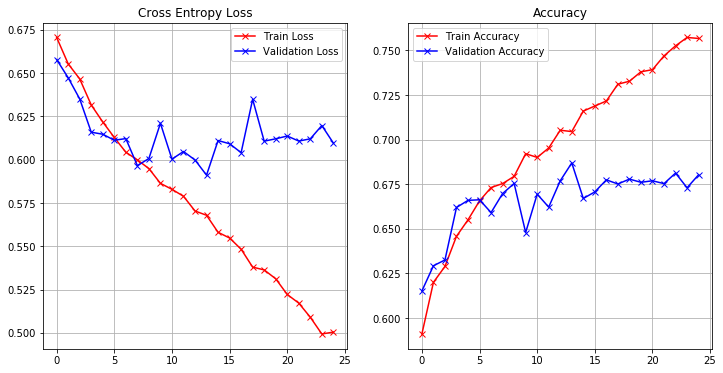

In [22]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(historyg.history["loss"], 'r-x', label="Train Loss")
ax.plot(historyg.history["val_loss"], 'b-x', label="Validation Loss")
ax.legend()
ax.set_title('Cross Entropy Loss')
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax.plot(historyg.history["accuracy"], 'r-x', label="Train Accuracy")
ax.plot(historyg.history["val_accuracy"], 'b-x', label="Validation Accuracy")
ax.legend()
ax.set_title('Accuracy')
ax.grid(True)

<B> Building a simple CNN model with bigger kernel weights (96, 256, 384) </B>

In [11]:
modelg1 = Sequential()

modelg1.add(Conv2D(96, (7, 7), activation='relu', input_shape=(img_width, img_height,img_depth)))
modelg1.add(MaxPooling2D(pool_size=(2, 2)))
modelg1.add(BatchNormalization())
modelg1.add(Conv2D(256, (5, 5), activation='relu'))
modelg1.add(MaxPooling2D(pool_size=(2, 2)))
modelg1.add(BatchNormalization())
modelg1.add(Conv2D(384, (3, 3), activation='relu'))
modelg1.add(MaxPooling2D(pool_size=(2, 2)))
modelg1.add(Flatten())
modelg1.add(Dense(512, activation='relu'))
modelg1.add(Dropout(0.3))
modelg1.add(Dense(128, activation='relu'))
modelg1.add(Dropout(0.3))
modelg1.add(Dense(2, activation='sigmoid'))
modelg1.summary()

modelg1.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])


historyg1 = modelg1.fit(X_train, y_train, epochs=20, verbose=1, validation_data=(X_test, y_test))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 42, 42, 96)        14208     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 21, 21, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

total wrong validation predictions: 1460


              precision    recall  f1-score   support

           0       0.72      0.68      0.70      2485
           1       0.67      0.70      0.68      2257

    accuracy                           0.69      4742
   macro avg       0.69      0.69      0.69      4742
weighted avg       0.69      0.69      0.69      4742



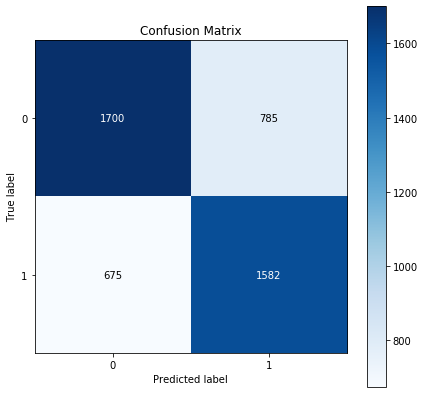

In [12]:
import scikitplot
y_valid = modelg1.predict_classes(X_test)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_test, axis=1), y_valid, figsize=(7,7))

print(f'total wrong validation predictions: {np.sum(np.argmax(y_test, axis=1) != y_valid)}\n\n')
print(classification_report(np.argmax(y_test, axis=1), y_valid))

In [14]:
modelg1.save("C:/Users/nihal/Desktop/DL_2")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:/Users/nihal/Desktop/DL_2\assets


<B> The model produced has training accuracy of 83% and validation accuracy of 71%,Its our optimal model  </B>

<B> Plotting the Train Vs Validation Accuracy and Loss Graphs </B>

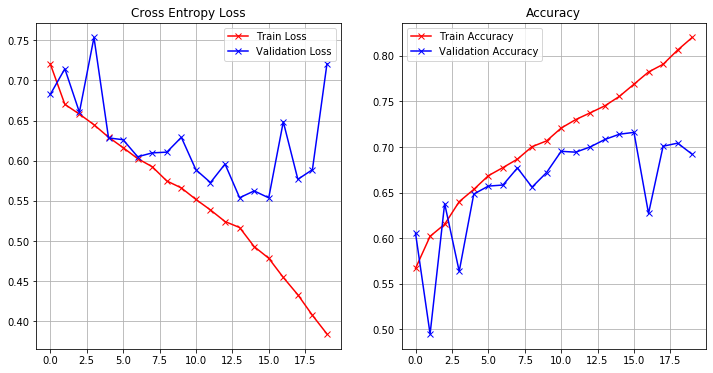

In [13]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(historyg1.history["loss"], 'r-x', label="Train Loss")
ax.plot(historyg1.history["val_loss"], 'b-x', label="Validation Loss")
ax.legend()
ax.set_title('Cross Entropy Loss')
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax.plot(historyg1.history["accuracy"], 'r-x', label="Train Accuracy")
ax.plot(historyg1.history["val_accuracy"], 'b-x', label="Validation Accuracy")
ax.legend()
ax.set_title('Accuracy')
ax.grid(True)

<B> A simple CNN model with less dense layers </B>

In [18]:
modelg2 = Sequential()

modelg2.add(Conv2D(32, (5, 5), activation='relu', input_shape=(img_width, img_height,img_depth)))
modelg2.add(MaxPooling2D(pool_size=(2, 2)))
modelg2.add(BatchNormalization())
modelg2.add(Conv2D(64, (3, 3), activation='relu'))
modelg2.add(MaxPooling2D(pool_size=(2, 2)))
modelg2.add(BatchNormalization())
modelg2.add(Conv2D(128, (3, 3), activation='relu'))
modelg2.add(MaxPooling2D(pool_size=(2, 2)))
modelg2.add(Flatten())
modelg2.add(Dense(128, activation='relu'))
modelg2.add(Dropout(0.3))
modelg2.add(Dense(2, activation='sigmoid'))
modelg2.summary()

modelg2.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])


historyg2 = modelg2.fit(X_train, y_train, epochs=11, verbose=1, validation_data=(X_test, y_test))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 44, 44, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 10, 10, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)        

<B> The model produced has training accuracy of 77% and validation accuracy of 70% and there is less gap 
in between training loss and validation loss</B>

<B> Plotting the Train Vs Validation Accuracy and Loss Graphs </B>

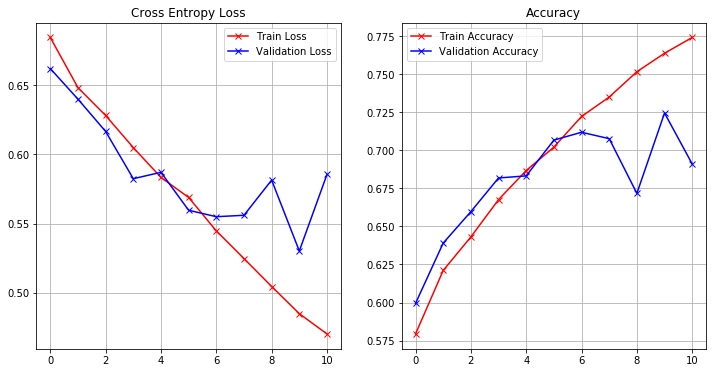

In [19]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(historyg2.history["loss"], 'r-x', label="Train Loss")
ax.plot(historyg2.history["val_loss"], 'b-x', label="Validation Loss")
ax.legend()
ax.set_title('Cross Entropy Loss')
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax.plot(historyg2.history["accuracy"], 'r-x', label="Train Accuracy")
ax.plot(historyg2.history["val_accuracy"], 'b-x', label="Validation Accuracy")
ax.legend()
ax.set_title('Accuracy')
ax.grid(True)

<B> Plotting the confusion matrix for the above model </B>

total wrong validation predictions: 1466


              precision    recall  f1-score   support

           0       0.66      0.85      0.74      2462
           1       0.76      0.52      0.62      2280

    accuracy                           0.69      4742
   macro avg       0.71      0.68      0.68      4742
weighted avg       0.71      0.69      0.68      4742



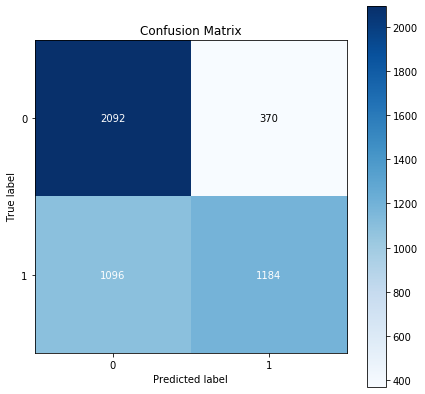

In [20]:
import scikitplot
y_valid = modelg2.predict_classes(X_test)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_test, axis=1), y_valid, figsize=(7,7))

print(f'total wrong validation predictions: {np.sum(np.argmax(y_test, axis=1) != y_valid)}\n\n')
print(classification_report(np.argmax(y_test, axis=1), y_valid))